# Importing Libraries

In [ ]:
%%capture
!pip install colabcode
!pip install fastapi

In [ ]:
from pydantic import BaseModel
from fastapi import FastAPI
from colabcode import ColabCode
import pickle

In [ ]:
import warnings
warnings.filterwarnings("ignore")
## for data
import numpy as np
import pandas as pd
import math
import io
import requests

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy

## for machine learning
from sklearn import preprocessing, utils, linear_model, feature_selection, model_selection, metrics, ensemble
from sklearn.model_selection import train_test_split

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
path = '/content/drive/MyDrive/Colab Notebooks/Graduation/data.csv'
dtf = pd.read_csv(path)
dtf.head()

,id,illness,heart_rate,spo2,age,gender,height,weight,smoker,alcoholic,pre_ill,transfered
0,1,Asthma Attack,99.9,96.1,26,NaN,166.0,100.0,1,1,6.0,0
1,2,Asthma Attack,69.9,99.6,42,male,174.0,95.0,1,0,6.0,0
2,3,Asthma Attack,80.8,98.4,68,female,167.0,84.0,1,1,NaN,0
3,4,Asthma Attack,72.0,98.2,21,NaN,193.0,98.0,1,1,7.0,0
4,5,Asthma Attack,75.6,97.5,38,female,188.0,85.0,1,1,NaN,0


In [ ]:
dtf.describe()

,id,heart_rate,spo2,age,height,weight,smoker,alcoholic,pre_ill,transfered
count,25762.000000,25762.000000,25762.000000,25762.000000,25762.000000,25762.000000,25762.000000,25762.000000,22672.000000,25762.000000
mean,13430.402453,84.480060,94.679276,49.666563,174.934244,94.969335,0.564863,0.507453,4.057516,0.742761
std,7702.022868,13.530829,9.739299,17.643753,14.653119,30.718589,0.495785,0.499954,2.000254,0.437121
min,1.000000,50.000000,9.200000,18.000000,150.000000,40.000000,0.000000,0.000000,1.000000,0.000000
25%,6961.250000,74.600000,94.600000,35.000000,162.000000,70.000000,0.000000,0.000000,2.000000,0.000000
50%,13401.500000,85.400000,96.700000,51.000000,175.000000,91.000000,1.000000,1.000000,4.000000,1.000000
75%,19841.750000,94.900000,98.300000,65.000000,188.000000,116.000000,1.000000,1.000000,6.000000,1.000000
max,28130.000000,120.000000,100.000000,80.000000,200.000000,200.000000,1.000000,1.000000,7.000000,1.000000


# Visulaizing Data

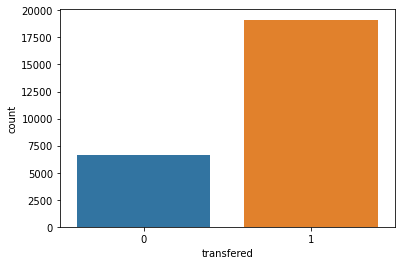

In [ ]:
plt.show(sns.countplot(x='transfered', data=dtf,))

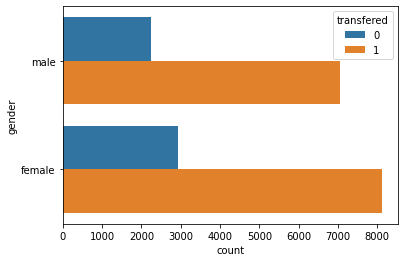

In [ ]:
plt.show(sns.countplot(y='gender', hue='transfered', data=dtf,))

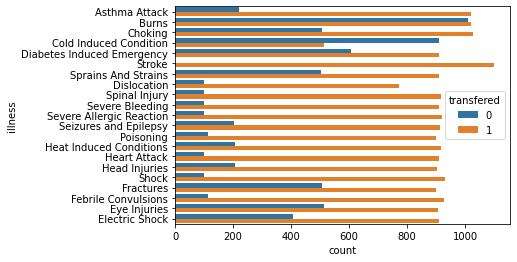

In [ ]:
plt.show(sns.countplot(y='illness', hue='transfered', data=dtf,))

# Data Analysis

Information about dataset

In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25762 entries, 0 to 25761
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          25762 non-null  int64  
 1   illness     25762 non-null  object 
 2   heart_rate  25762 non-null  float64
 3   spo2        25762 non-null  float64
 4   age         25762 non-null  int64  
 5   gender      20335 non-null  object 
 6   height      25762 non-null  float64
 7   weight      25762 non-null  float64
 8   smoker      25762 non-null  int64  
 9   alcoholic   25762 non-null  int64  
 10  pre_ill     22672 non-null  float64
 11  transfered  25762 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 2.4+ MB


Missing values (Null Values)

In [ ]:
features_with_null = [feature for feature in dtf.columns if dtf[feature].isnull().sum()]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Features with Null Values ['gender', 'pre_ill']


In [ ]:
# Dropping the none values
dtf = dtf.dropna()

Duplicated Values

In [ ]:
# Viewing the number of duplicated rows
duplicate_sum = dtf.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


Dropping ID field (Since we don't need it)

In [ ]:
# Drop the id field
dtf.drop(columns=['id'], inplace=True)

Getting all the illnesses

In [ ]:
illnesses = (dtf['illness']).unique()
illnesses.sort()
for i in range(len(illnesses)):
  print(illnesses[i])

Asthma Attack
Burns
Choking
Cold Induced Condition
Diabetes Induced Emergency
Dislocation
Electric Shock
Eye Injuries
Febrile Convulsions
Fractures
Head Injuries
Heart Attack
Heat Induced Conditions
Poisoning
Seizures and Epilepsy
Severe Allergic Reaction
Severe Bleeding
Shock
Spinal Injury
Sprains And Strains
Stroke


In [ ]:
print('Total {} datapoints remaining with {} features'.format(dtf.shape[0], dtf.shape[1]))

Total 17910 datapoints remaining with 11 features


# Feature Engineering

In [ ]:
# Replacing gender values
dtf['gender'].replace('female', 0, inplace=True)
dtf['gender'].replace('male', 1, inplace=True)


# Calculating the BMI for the records
dtf.insert(10, 'BMI', dtf['weight']/(np.power(dtf['height']/100, 2)))
dtf['BMI'] = dtf['BMI'].astype(int)

# Replacing Ilnesses values
for i in range(len(illnesses)):
  dtf['illness'].replace(illnesses[i], i+1, inplace=True)

In [ ]:
dtf.head()

,illness,heart_rate,spo2,age,gender,height,weight,smoker,alcoholic,pre_ill,BMI,transfered
1,1,69.9,99.6,42,1,174.0,95.0,1,0,6.0,31,0
5,1,67.5,98.8,30,0,192.0,58.0,1,0,6.0,15,0
7,1,84.5,96.8,41,0,180.0,73.0,1,0,5.0,22,0
8,1,95.9,96.9,19,0,197.0,69.0,1,1,7.0,17,0
9,1,92.4,98.8,25,0,184.0,79.0,1,0,5.0,23,0


# Data Normalization

In [ ]:
normalized_columns = ['illness', 'heart_rate', 'spo2', 'age', 'height', 'weight', 'pre_ill', 'BMI']
dtf[normalized_columns] = dtf[normalized_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
dtf.head()

,illness,heart_rate,spo2,age,gender,height,weight,smoker,alcoholic,pre_ill,BMI,transfered
1,0.0,0.284286,0.995590,0.387097,1,0.48,0.34375,1,0,0.833333,0.276316,0
5,0.0,0.250000,0.986770,0.193548,0,0.84,0.11250,1,0,0.833333,0.065789,0
7,0.0,0.492857,0.964719,0.370968,0,0.60,0.20625,1,0,0.666667,0.157895,0
8,0.0,0.655714,0.965821,0.016129,0,0.94,0.18125,1,1,1.000000,0.092105,0
9,0.0,0.605714,0.986770,0.112903,0,0.68,0.24375,1,0,0.666667,0.171053,0


# Feature Selection

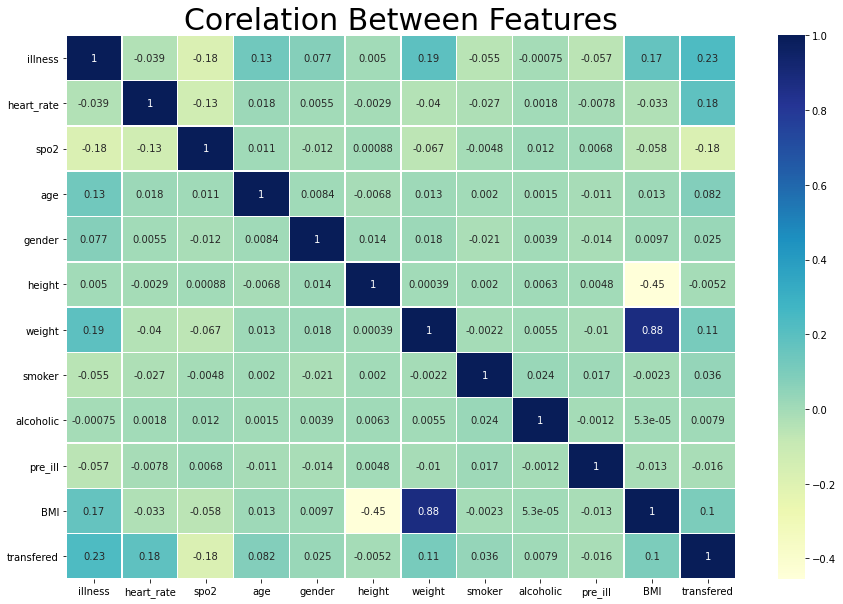

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(dtf.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

Dropping none required fields

In [ ]:
dtf.drop(['weight','height'], axis =1, inplace=True)

In [ ]:
dtf.head()

,illness,heart_rate,spo2,age,gender,smoker,alcoholic,pre_ill,BMI,transfered
1,0.0,0.284286,0.995590,0.387097,1,1,0,0.833333,0.276316,0
5,0.0,0.250000,0.986770,0.193548,0,1,0,0.833333,0.065789,0
7,0.0,0.492857,0.964719,0.370968,0,1,0,0.666667,0.157895,0
8,0.0,0.655714,0.965821,0.016129,0,1,1,1.000000,0.092105,0
9,0.0,0.605714,0.986770,0.112903,0,1,0,0.666667,0.171053,0


# Preparing for Modeling

In [ ]:
# Getting the target and its values
features = dtf.loc[:,'illness':'BMI']
target = dtf.loc[:,'transfered']
####
X_unprocessed = features.values
y_unprocessed = target.values

target_names = dtf.transfered.unique()
features_names = dtf.columns


print("X.shape: {}  y.shape: {}".format(X_unprocessed.shape, y_unprocessed.shape))

print("features names: {}".format(list(features_names)))
print("target names: {} ".format(target_names))

X.shape: (17910, 9)  y.shape: (17910,)
features names: ['illness', 'heart_rate', 'spo2', 'age', 'gender', 'smoker', 'alcoholic', 'pre_ill', 'BMI', 'transfered']
target names: [0 1] 


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report


def train_and_test(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:,1]


    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)


    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()

    # print scores
    print ("accuracy  score: {} %".format(accuracy))
    print ("auc  score: {} ".format(roc_auc))
    print(classification_rep)

    # print ROC curve
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange',
    #      lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver operating characteristic example')
    # plt.legend(loc="lower right")
    # plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_unprocessed, y_unprocessed, random_state=1, stratify=y_unprocessed)

# Training

----------------Dummy----------------


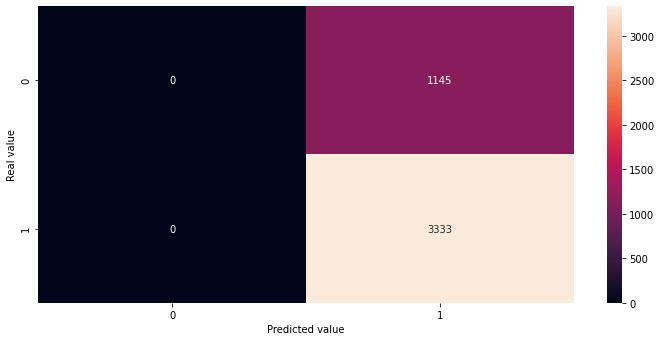

accuracy  score: 0.7443054935238946 %
auc  score: 0.5 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1145
           1       0.74      1.00      0.85      3333

    accuracy                           0.74      4478
   macro avg       0.37      0.50      0.43      4478
weighted avg       0.55      0.74      0.64      4478



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Trying Dummy Calssifier
dummyCalssifier = DummyClassifier(strategy = 'most_frequent')
print('----------------Dummy----------------')
train_and_test(dummyCalssifier, X_train, X_test, y_train, y_test)

----------------LR----------------


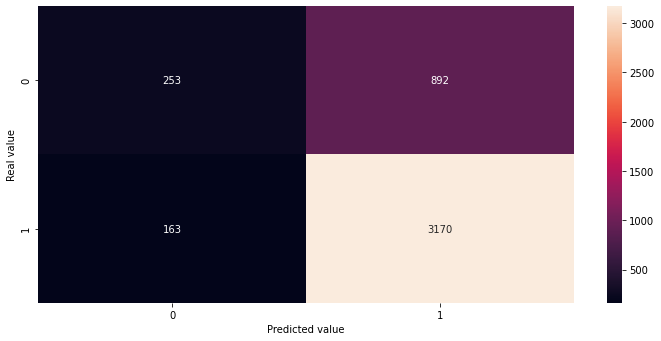

accuracy  score: 0.7644037516748549 %
auc  score: 0.7787597100321386 
              precision    recall  f1-score   support

           0       0.61      0.22      0.32      1145
           1       0.78      0.95      0.86      3333

    accuracy                           0.76      4478
   macro avg       0.69      0.59      0.59      4478
weighted avg       0.74      0.76      0.72      4478

----------------SVC----------------


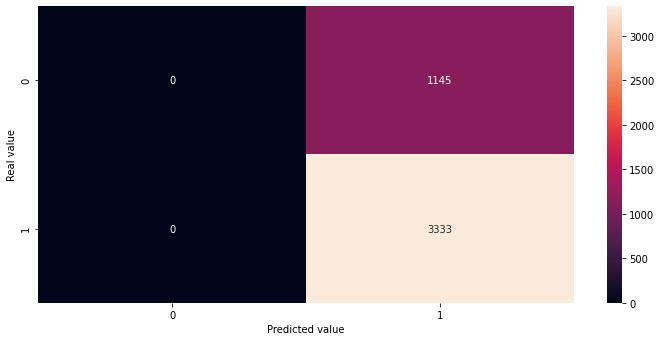

accuracy  score: 0.7443054935238946 %
auc  score: 0.7703389552929092 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1145
           1       0.74      1.00      0.85      3333

    accuracy                           0.74      4478
   macro avg       0.37      0.50      0.43      4478
weighted avg       0.55      0.74      0.64      4478



In [ ]:
# lr classifier
print('----------------LR----------------')
lrCalssifier = LogisticRegression()
train_and_test(lrCalssifier, X_train, X_test, y_train, y_test)

# svm
print('----------------SVC----------------')
svm = SVC(kernel = 'linear', probability=True)
train_and_test(svm, X_train, X_test, y_train, y_test)

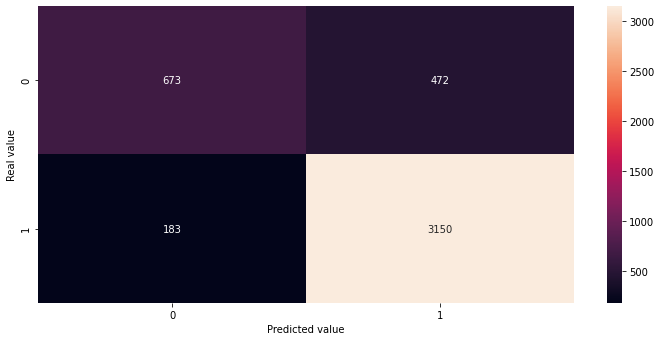

accuracy  score: 0.8537293434569004 %
auc  score: 0.9100825803104328 
              precision    recall  f1-score   support

           0       0.79      0.59      0.67      1145
           1       0.87      0.95      0.91      3333

    accuracy                           0.85      4478
   macro avg       0.83      0.77      0.79      4478
weighted avg       0.85      0.85      0.85      4478



In [ ]:
# Random Forest Classifier
rfCalssifier = RandomForestClassifier()
train_and_test(rfCalssifier, X_train, X_test, y_train, y_test)

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
X_new = SelectPercentile(chi2, percentile=50).fit_transform(X_unprocessed, y_unprocessed)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_unprocessed, random_state=1, stratify=y_unprocessed)

----------------LR----------------


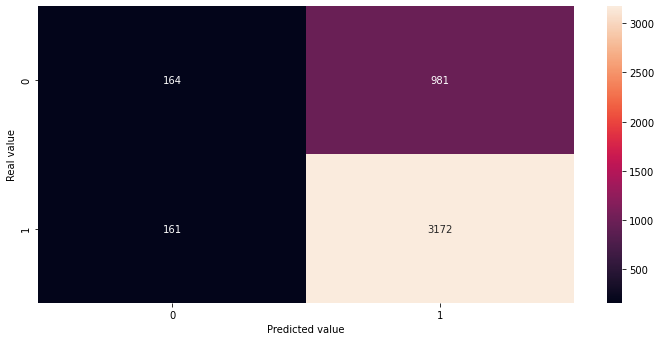

accuracy  score: 0.74497543546226 %
auc  score: 0.7127507510576385 
              precision    recall  f1-score   support

           0       0.50      0.14      0.22      1145
           1       0.76      0.95      0.85      3333

    accuracy                           0.74      4478
   macro avg       0.63      0.55      0.54      4478
weighted avg       0.70      0.74      0.69      4478



In [ ]:
# lr classifier
print('----------------LR----------------')
lrCalssifierFS = LogisticRegression()
train_and_test(lrCalssifierFS, X_new_train, X_new_test, y_new_train, y_new_test)

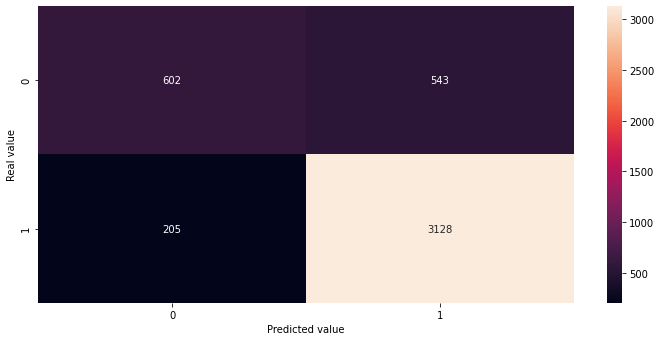

accuracy  score: 0.8329611433675748 %
auc  score: 0.8564234589397804 
              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1145
           1       0.85      0.94      0.89      3333

    accuracy                           0.83      4478
   macro avg       0.80      0.73      0.76      4478
weighted avg       0.82      0.83      0.82      4478



In [ ]:
# Random Forest Classifier
rfCalssifierFS = RandomForestClassifier()
train_and_test(rfCalssifierFS, X_new_train, X_new_test, y_new_train, y_new_test)

# Dumbing chosen model



In [ ]:
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Graduation/EmergencyModel.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(rfCalssifier, file)

# Working on the API

In [ ]:
class EmergencyCase(BaseModel):
    illness: int
    heart_rate: float
    spo2: float
    age: int
    gender: int
    height: float
    weight: float
    smoker: int
    alcoholic: int
    pre_ill: int
    class Config:
        schema_extra = {
            "example": {
                "illness": 3,
                "heart_rate": 80.3,
                "spo2": 70.5,
                "age": 33,
                "gender": 0,
                "height": 158.3,
                "weight": 60.5,
                "smoker": 1,
                "alcoholic": 0,
                "pre_ill": 2
            }
        }

In [ ]:
app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Graduation/EmergencyModel.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_transfered_status(data: EmergencyCase):
    received = data.dict()
    illness = received['illness']
    heart_rate = received['heart_rate']
    spo2 = received['spo2']
    age = received['age']
    gender = received['gender']
    height = received['height']
    weight = received['weight']
    smoker = received['smoker']
    alcoholic = received['alcoholic']
    pre_ill = received['pre_ill']
    BMI = weight/(np.power(height/100, 2))
    return {'prediction': 1}
    pred_transfered = model.predict([[illness, heart_rate, spo2,
                                age, gender, somker, alcoholic, pre_ill, BMI]]).tolist()[0]
    return {'prediction': pred_transfered}

In [ ]:
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

INFO:     Started server process [63]
INFO:     Waiting for application startup.


Public URL: NgrokTunnel: "https://45a2-34-125-51-103.ngrok.io" -> "http://localhost:10000"


INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)
